# Data Exploration - Hubble Variables

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce

In [2]:
# for center lables in histo
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])

In [3]:
data = pd.read_csv('variables.csv')
print('Total num obj: {}'.format(len(data['MatchID'].unique())))
data


Total num obj: 84428


MatchID       Filter  GroupID  SubGroupID          RA        Dec  \
0   106998875    ACS_F775W  1045904          96   10.785860  41.018631   
0    57918789   WFC3_F606W  1063416          12  269.607178 -29.184095   
1    57918789   WFC3_F814W  1063416          12  269.607178 -29.184095   
0   101894155    ACS_F475W  1045904          35   11.407063  41.975758   
1   101894155    ACS_F814W  1045904          35   11.407063  41.975758   
..        ...          ...      ...         ...         ...        ...   
3    36927248   WFC3_F555W    12611          20  201.669983 -47.474350   
4    36927248   WFC3_F606W    12611          20  201.669983 -47.474350   
5    36927248   WFC3_F775W    12611          20  201.669983 -47.474350   
6    36927248   WFC3_F814W    12611          20  201.669983 -47.474350   
7    36927248  WFC3_F850LP    12611          20  201.669983 -47.474350   

    AutoClass  ExpertClass VarQualFlag  FilterDetFlag  NumLC    MeanMag  \
0           1            2       AABAA              1      9  23.055889   
0           1            0       AAAAC              0     11  24.307246   
1           1            0       AACAA              1     12  22.780175   
0           1            0       AAACC              0      5  24.589780   
1           1            0       CABCB              1      5  22.888680   
..        ...          ...         ...            ...    ...        ...   
3           1            0       AAAAA              0      6  20.892200   
4           1            0       AAAAC              0     71  20.709835   
5           1            0       CAAAA              0      6  20.123434   
6           1            0       AAABB              1      8  20.163488   
7           1            0       AAAAC              0      5  20.147460   

    MeanCorrMag       MAD        Chi2  
0     23.055717  0.055739    4.887366  
0     24.309385  0.054577    2.575818  
1     22.782607  0.078359   12.194631  
0     24.589851  0.047338    2.514890  
1     22.890168  0.060148   52.644922  
..          ...       ...         ...  
3     20.891378  0.022039   21.140251  
4     20.711227  0.019037   10.341167  
5     20.122217  0.051070  214.225505  
6     20.163773  0.062403   28.207284  
7     20.149246  0.023754   17.602146  

[179871 rows x 15 columns]

There are 13533 classified objects
There are 70895 unclassified objects


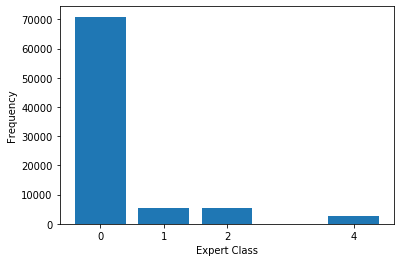

In [4]:
firstEntry = data.groupby('MatchID').first()
print('There are {} classified objects'.format(len(firstEntry[firstEntry.ExpertClass!=0])))
print('There are {} unclassified objects'.format(len(firstEntry) - len(firstEntry[firstEntry.ExpertClass!=0])))

labels, counts = np.unique(firstEntry.ExpertClass, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xlabel('Expert Class')
plt.ylabel('Frequency')
plt.savefig("./Figures/classified-unclassified.png")
plt.show()

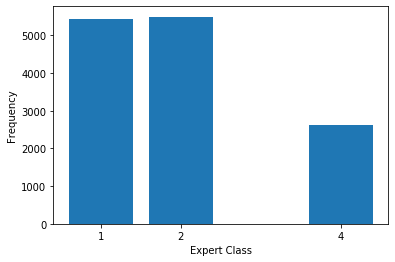

In [5]:
labels, counts = np.unique(firstEntry[firstEntry.ExpertClass!=0].ExpertClass, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xlabel('Expert Class')
plt.ylabel('Frequency')
plt.savefig("./Figures/eclass.png")
plt.show()

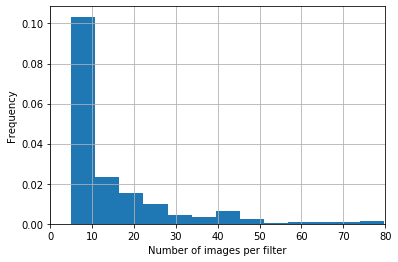

In [6]:
data.NumLC.hist(bins=20,density=True)
plt.xlabel('Number of images per filter')
plt.ylabel('Frequency')
plt.xlim(0,80)
plt.savefig("./Figures/imagesperfilter.png")
plt.show()

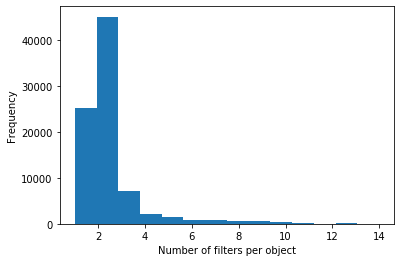

MatchID
352          2
857          2
875          7
1130         1
1708         2
            ..
108166460    4
108167666    1
108168307    2
108168989    4
108169792    2
Name: Filter, Length: 84428, dtype: int64

In [14]:
plt.hist(data.groupby('MatchID').count()['Filter'],bins=14)
plt.xlabel('Number of filters per object')
plt.ylabel('Frequency')
plt.savefig("filtersperobject")
plt.show()

In [33]:
FilterMm=list(data.groupby('Filter').count()['MatchID'].sort_values(ascending=False).keys())

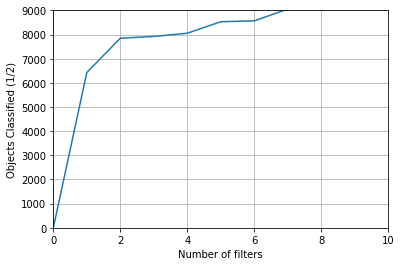

In [47]:
cc=[]
for i in range(len(FilterMm)):
#     ff = FilterMm[i]
    can = len(data[ ((data.ExpertClass == 1) | (data.ExpertClass == 2)) & (data.Filter.isin(FilterMm[:i]))].MatchID.unique())
    cc.append(can)
plt.plot(range(0,len(FilterMm)),cc)
plt.ylim(0,9000)
plt.xlim(0,10)
plt.xlabel("Number of filters")
plt.ylabel("Objects Classified (1/2)")
plt.savefig("NObjectsperNfilter")
plt.grid()

In [32]:
# data[ ((data.ExpertClass == 1) | (data.ExpertClass == 2))]
FilterMm[:2]

Index(['ACS_F814W', 'WFC3_F814W'], dtype='object', name='Filter')

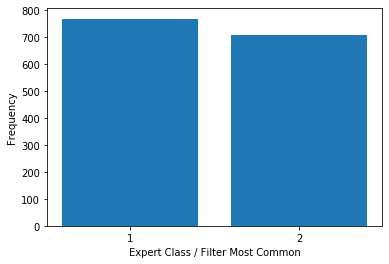

1479


In [8]:
EClassFilter=firstEntry[(firstEntry.ExpertClass!=0) & (firstEntry.ExpertClass!=4) & (firstEntry.Filter=="ACS_F814W")].ExpertClass
labels, counts = np.unique(EClassFilter, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xlabel('Expert Class / Filter Most Common')
plt.ylabel('Frequency')
plt.savefig("./Figures/eclass_filter.png")
plt.show()
print(len(EClassFilter))

In [9]:
print('There are a total of {} different filters. The different types of filters are:'.format(len(data.Filter.unique())))
for f in data.Filter.unique():
    print(f)

There are a total of 47 different filters. The different types of filters are:
ACS_F775W
WFC3_F606W
WFC3_F814W
ACS_F475W
ACS_F814W
ACS_F606W
ACS_F555W
ACS_F658N
ACS_F435W
WFC3_F475W
WFC3_F502N
WFC3_F656N
ACS_F625W
ACS_F850LP
ACS_F502N
WFPC2_F555W
WFC3_F350LP
WFC3_F225W
WFC3_F275W
WFC3_F336W
WFC3_F438W
WFC3_F467M
WFC3_F555W
WFC3_F850LP
WFC3_F775W
WFC3_F105W
WFC3_F125W
WFC3_F140W
WFC3_F160W
WFC3_F658N
WFPC2_F439W
WFPC2_F675W
WFPC2_F606W
WFPC2_F814W
WFC3_F390W
WFPC2_F656N
WFC3_F600LP
WFC3_F153M
WFC3_F110W
ACS_F550M
ACS_F660N
WFPC2_F450W
WFPC2_F336W
WFPC2_F502N
WFPC2_F300W
WFC3_F139M
WFC3_F098M


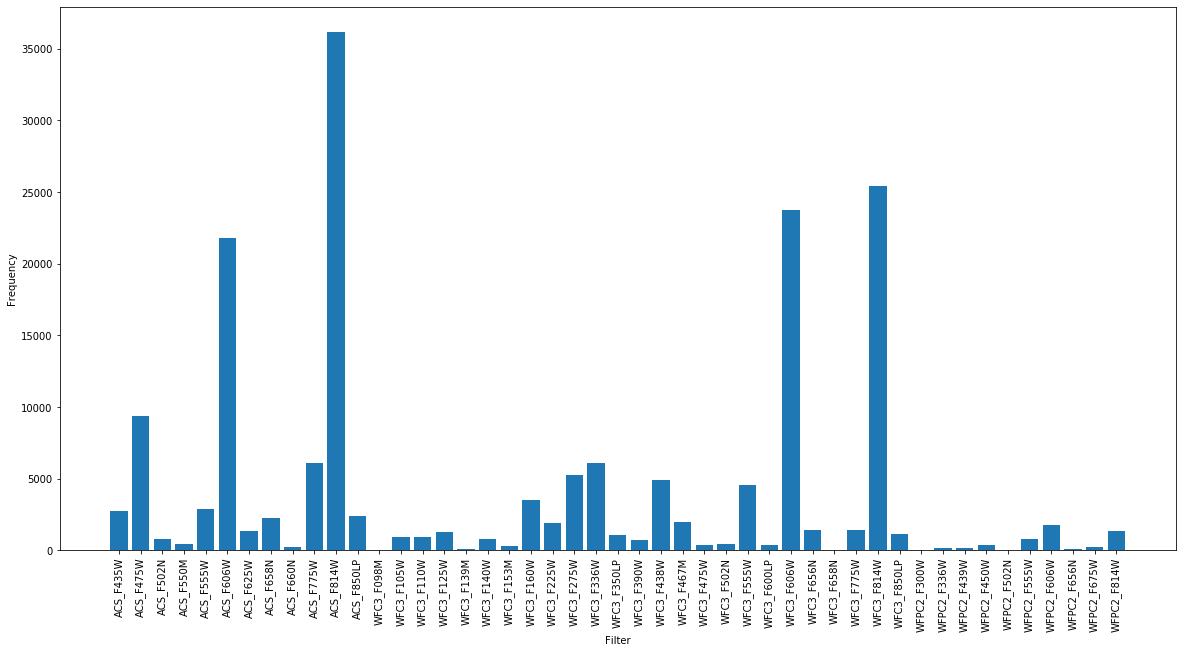

In [10]:
fig = plt.figure(figsize=(20,10))
# plt.hist(data.Filter)
# plt.xticks(rotation='vertical')
# plt.show()
labels, counts = np.unique(data.Filter, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xticks(rotation='vertical')
plt.gca().set_xticks(labels)
plt.xlabel('Filter')
plt.ylabel('Frequency')
plt.savefig("./Figures/distributionoffilters.png")
plt.show()

In [11]:
data[data.MatchID==28599054]

MatchID      Filter  GroupID  SubGroupID          RA        Dec  \
0  28599054  WFC3_F606W  1063416           6  269.733765 -29.151371   
1  28599054  WFC3_F814W  1063416           6  269.733765 -29.151371   

   AutoClass  ExpertClass VarQualFlag  FilterDetFlag  NumLC    MeanMag  \
0          1            0       AAAAB              1     20  20.358125   
1          1            0       AACAA              0     19  19.526800   

   MeanCorrMag       MAD       Chi2  
0    20.357636  0.015027  81.065802  
1    19.527640  0.013430  53.362271

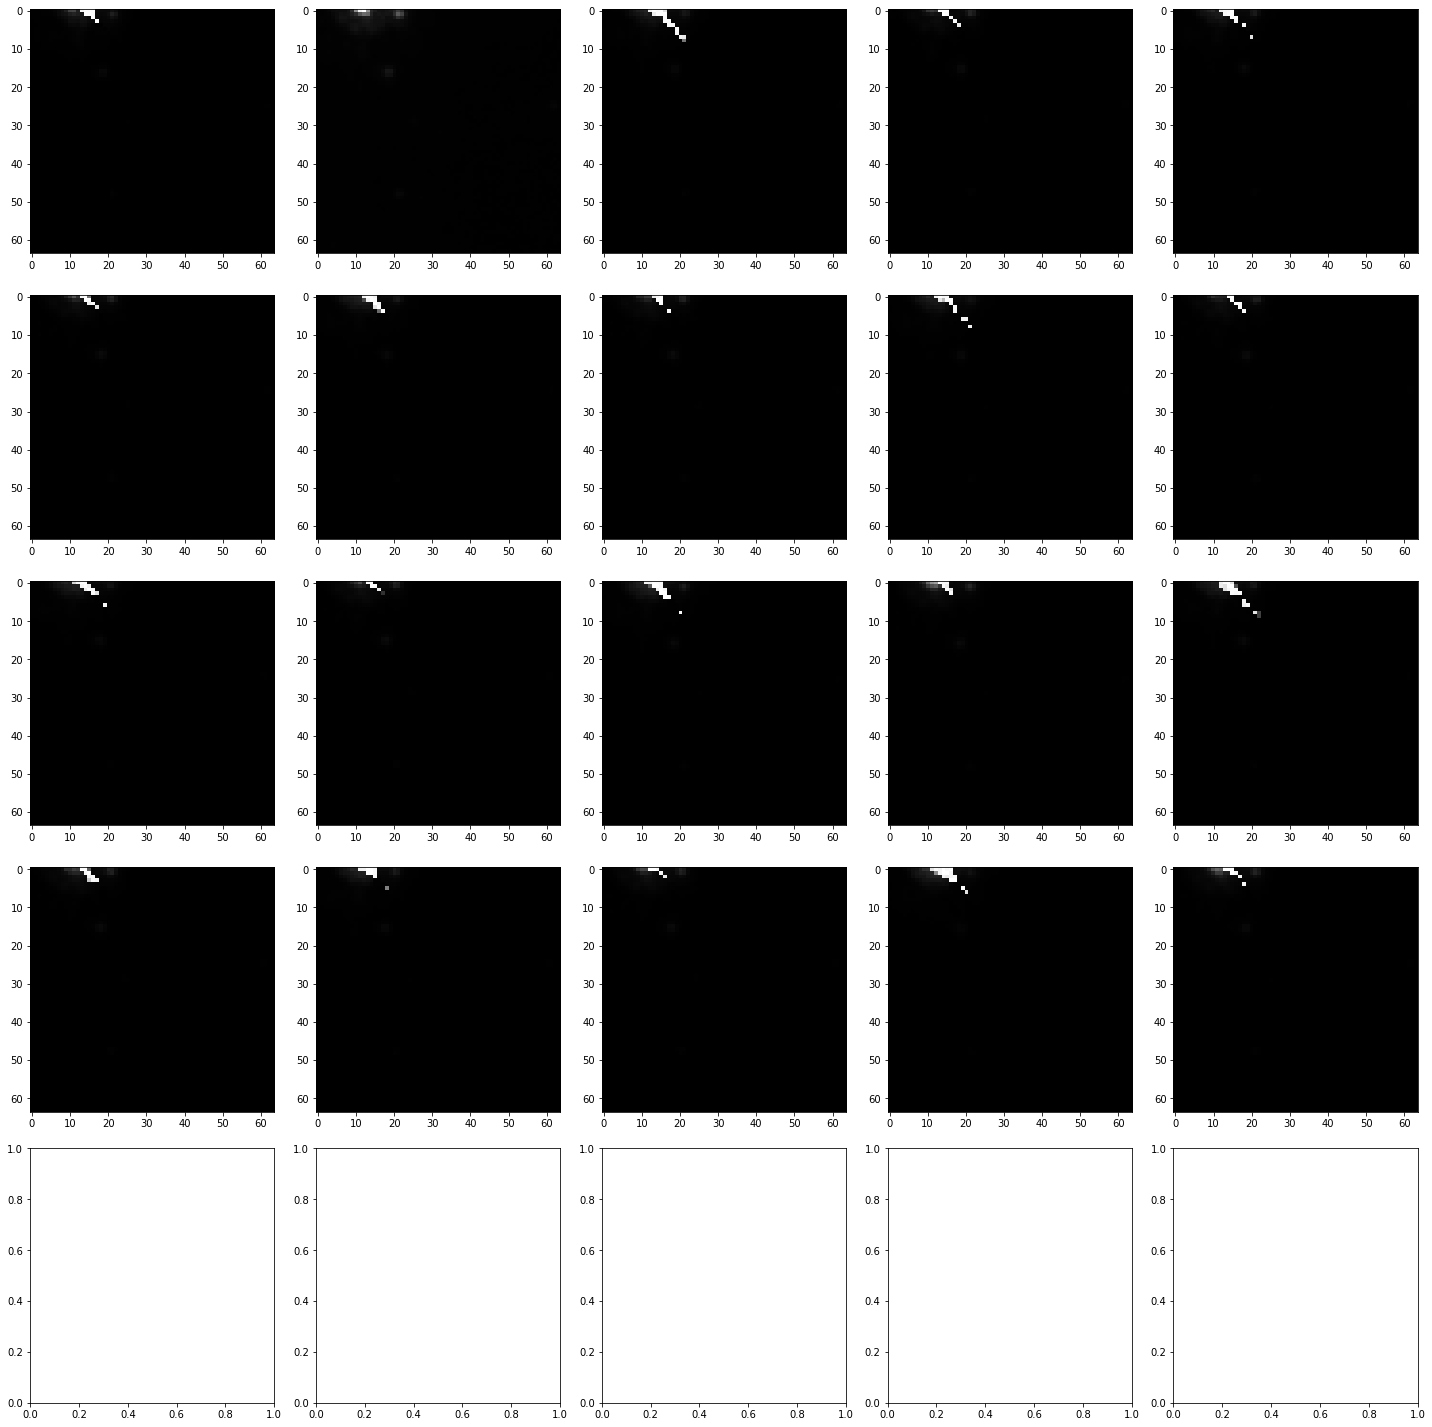

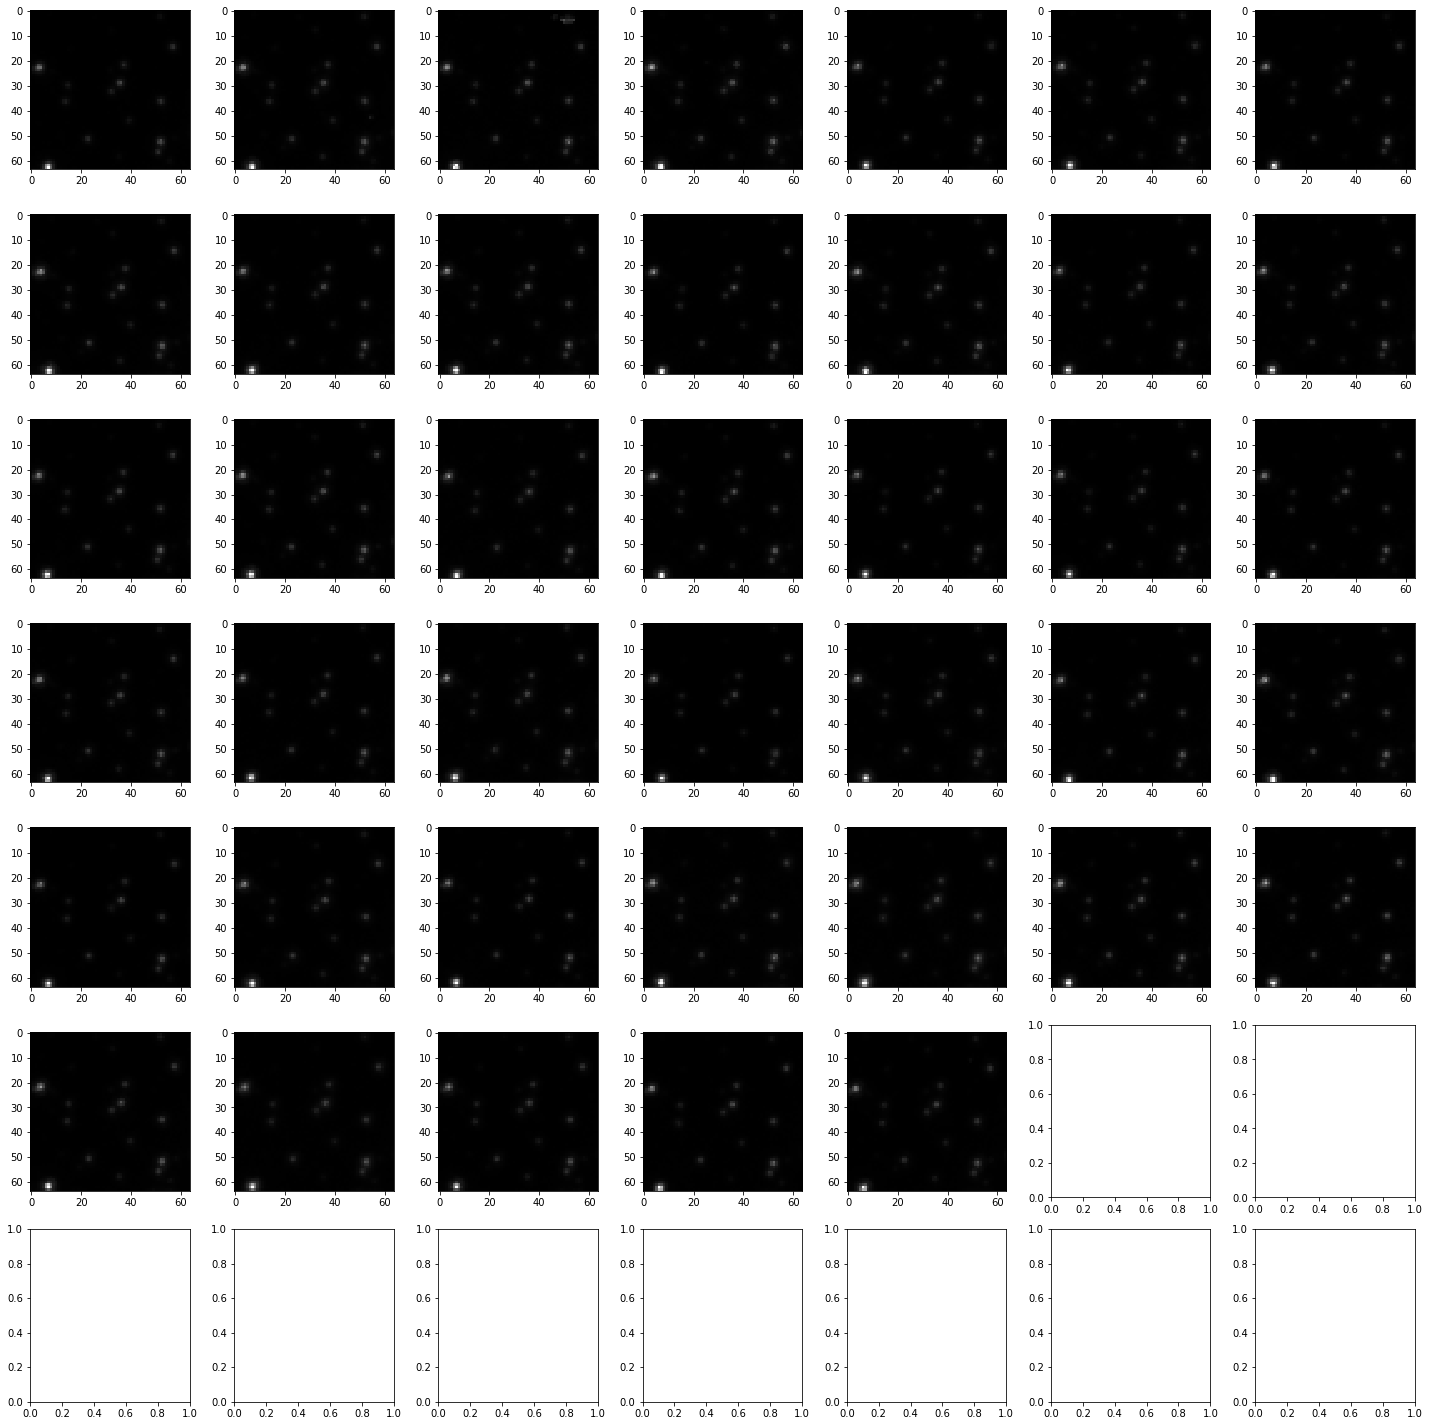

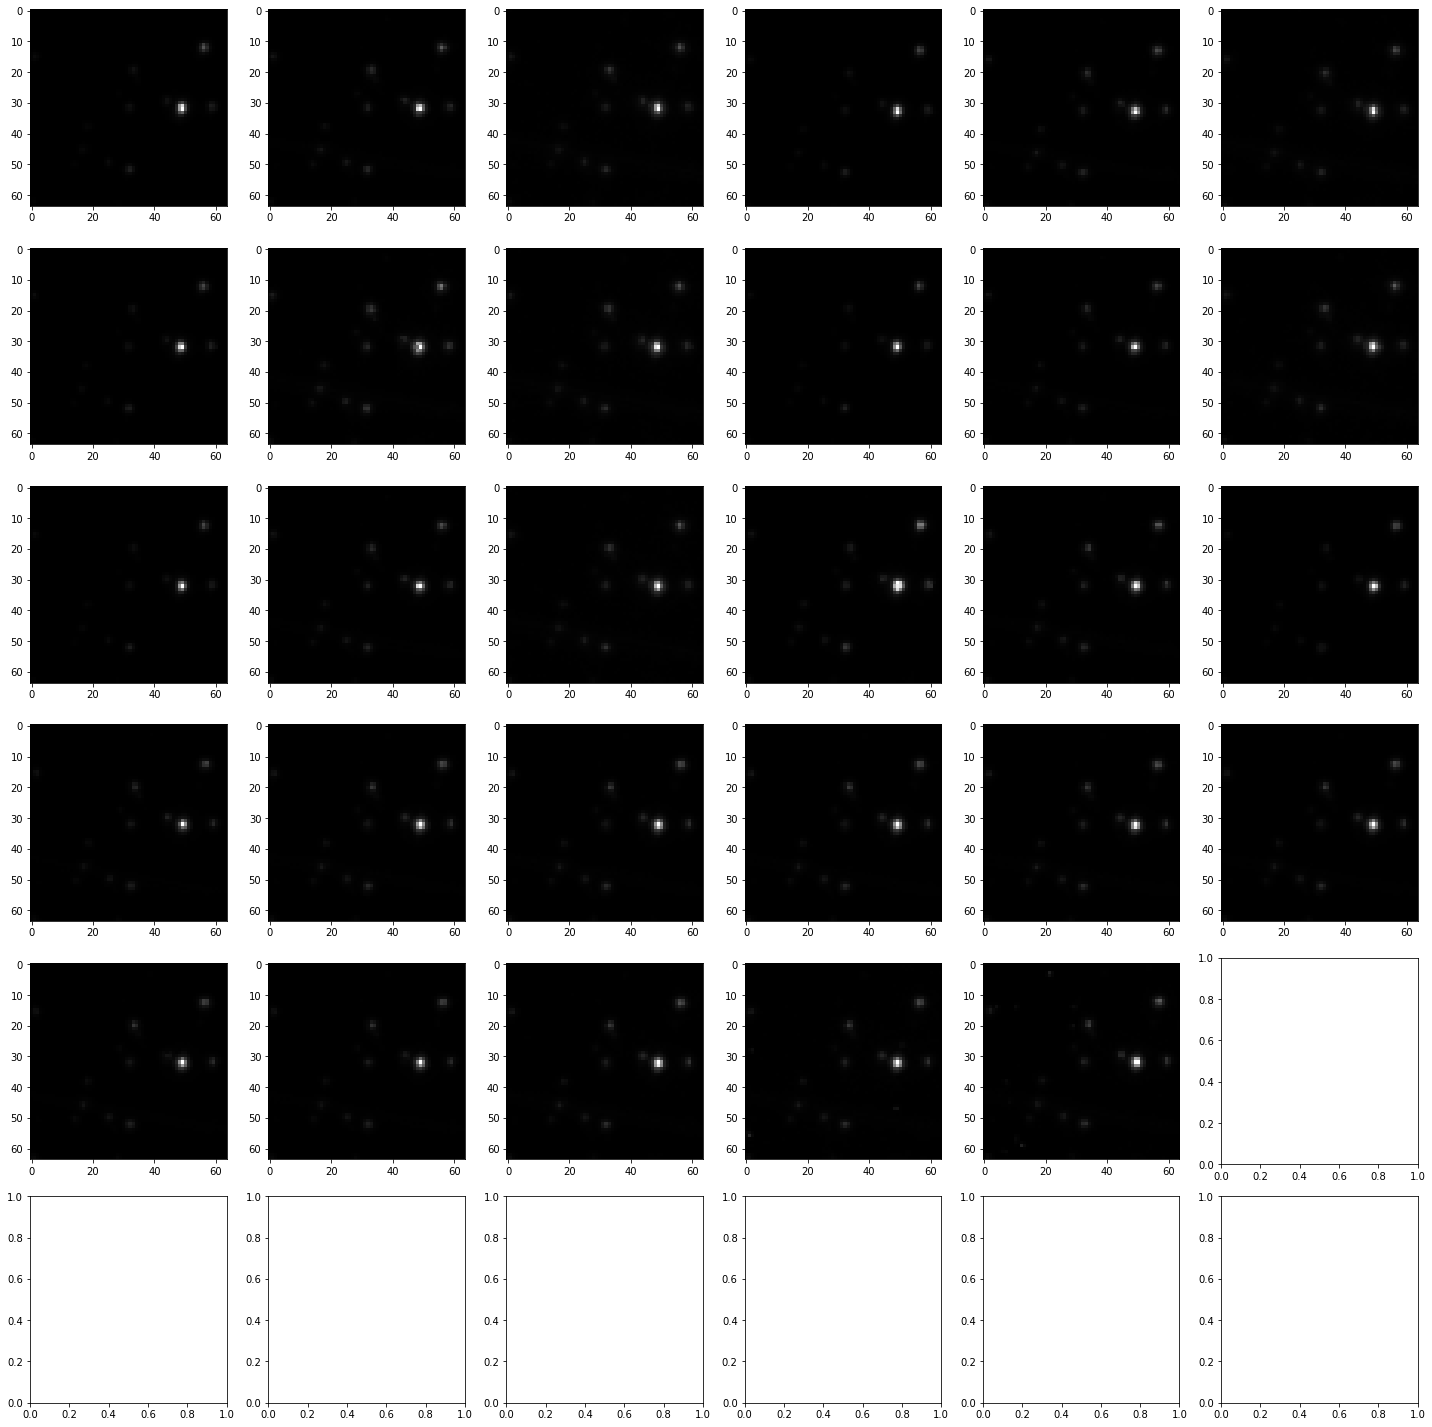

In [12]:
path = "VARex"
di = !ls $path

for k in di:
    path_full=path+"/"+str(k)
    images = !ls $path_full

    size=np.array(images).shape
    size2=int(np.sqrt(size))+1

    fig, axs = plt.subplots(nrows=size2, ncols=size2, figsize=(20,20))

    for ax, i in zip(axs.flat, images):
        im=np.load(path_full+"/"+str(i))
        ax.imshow(im, cmap='gray')

    plt.tight_layout()
    plt.show()    